In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic_toy.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [4]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Survived     0.000000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

<ipython-input-7-55cc01c98bba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_imputed'] = X_train['Age']
<ipython-input-7-55cc01c98bba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age_imputed'] = X_test['Age']


In [8]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,NaN,41.0
435,14.0,120.0000,14.0


In [9]:
X_test.head()

,Age,Fare,Age_imputed
709,NaN,15.2458,NaN
439,31.0,10.5000,31.0
840,20.0,7.9250,20.0
720,6.0,33.0000,6.0
39,14.0,11.2417,14.0


In [10]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

<ipython-input-10-c2348534f728>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
<ipython-input-10-c2348534f728>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values


In [11]:
X_test['Age_imputed'].isnull().sum()

0

In [12]:
X_train.sample(5)

,Age,Fare,Age_imputed
851,74.0,7.7750,74.0
646,19.0,7.8958,19.0
345,24.0,13.0000,24.0
681,27.0,76.7292,27.0
184,4.0,22.0250,4.0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


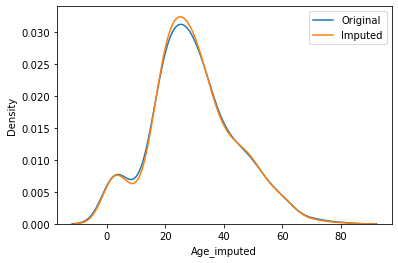

In [13]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label='Imputed',hist=False)
plt.legend()
plt.show()

In [14]:
print('Original variable variance: ',X_train['Age'].var())
print('Variance after random imputation: ',X_train['Age_imputed'].var())

Original variable variance:  210.2517072477438
Variance after random imputation:  204.32267746626084


In [15]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2761.031435,75.481375,61.694396
Age,75.481375,210.251707,210.251707
Age_imputed,61.694396,210.251707,204.322677


<AxesSubplot:>

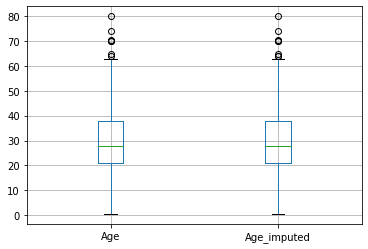

In [16]:
X_train[['Age','Age_imputed']].boxplot()

In [24]:
Q1,Q3 = np.percentile(X_train['Age_imputed'],[25,75])

In [25]:
Q1,Q3

(21.0, 38.0)

In [26]:
IQR = Q3 -Q1

In [27]:
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [28]:
out = X_train['Age_imputed'][(X_train['Age_imputed']<lower)| (X_train['Age_imputed']>upper)]

In [29]:
print(out)

456    65.0
116    70.5
745    70.0
630    80.0
186    64.0
851    74.0
438    64.0
672    70.0
Name: Age_imputed, dtype: float64


In [30]:
data = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [32]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [33]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [34]:
X = data
y = data['SalePrice']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

<ipython-input-37-7f34ed3d68df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'] = X_train['GarageQual']
<ipython-input-37-7f34ed3d68df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'] = X_test['GarageQual']


In [38]:
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed']  = X_test['FireplaceQu']

<ipython-input-38-08d2c3752251>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
<ipython-input-38-08d2c3752251>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['FireplaceQu_imputed']  = X_test['FireplaceQu']


In [39]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
328,NaN,TA,214500,TA,NaN
942,NaN,NaN,150000,NaN,NaN
1118,NaN,TA,140000,TA,NaN
1071,NaN,TA,154000,TA,NaN
951,NaN,TA,119900,TA,NaN


In [40]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

<ipython-input-40-f5eeca8d3074>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
<ipython-input-40-f5eeca8d3074>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
<ipython-input-40-f5eeca8d3074>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

In [41]:
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts()/len(X_train)
    ],
    axis = 1
)
temp.columns = ['Original','Imputed']

temp

,Original,Imputed
TA,0.951087,0.951199
Fa,0.032609,0.030822
Gd,0.011775,0.013699
Ex,0.002717,0.002568
Po,0.001812,0.001712


In [42]:
temp = pd.concat(
    [
        X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts()/len(X_train)
    ],
    axis = 1
)
temp.columns = ['Original','Imputed']

temp

,Original,Imputed
Gd,0.491143,0.497432
TA,0.405797,0.402397
Fa,0.043478,0.042808
Ex,0.033816,0.030822
Po,0.025765,0.026541


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

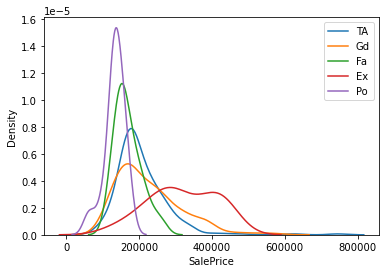

In [48]:
for cat in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu']==cat]['SalePrice'],hist=False,label=cat)
plt.legend()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

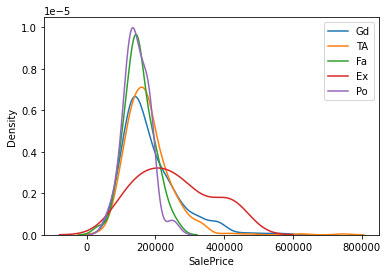

In [55]:
for cat in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed']==cat]['SalePrice'],hist=False,label=cat)
plt.legend()
plt.show()